In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
#%matplotlib notebook

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'STIXGeneral'


In [51]:
coreNames_all = ['B16', 'B17','B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B26', 'B27', 'B28', 'B29', 'B30'] 
bdot0s = np.array([0.143, 0.115, 0.105, 0.091, 0.096, 0.105, 0.141, 0.116, 0.172, 0.165, 0.174, 0.137, 0.158])
Temp0s = np.array([-32.5, -32.3, -32.3, -30.9, -30.4, -30.1,-29.8, -29.3, -30.3, -30.6, -30.6, -31.6, -31.8])+ 273.15

coreNames_chosen = ['B30']# 'B18', 'B26']#coreNames_all#
IDXcoreNames_chosen = [coreNames_all.index(coreNames_chosen[i]) for i in range(len(coreNames_chosen))]

bdot0s_chosen = bdot0s[IDXcoreNames_chosen]
Temp0s_chosen = Temp0s[IDXcoreNames_chosen]


In [52]:
df_dens = []; dens0s = []
j = 0
for i in coreNames_chosen:
    df_dens.append(pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=i, index=False))
    dens0s.append(df_dens[j]['density'][0])
    print(dens0s)
    j += 1


[352.3809523809524]


0.3683807331533929


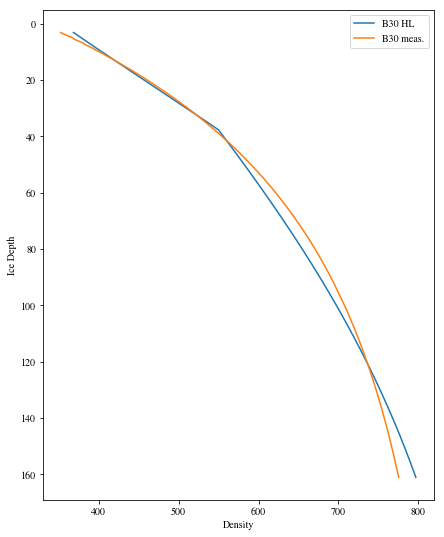

In [53]:
from HL_AnalyticThea_class import HL_Thea

fig, ax = plt.subplots(figsize = (7,9))
ax.set(xlabel='Density', ylabel='Ice Depth')
ax.invert_yaxis()


for i in range(len(coreNames_chosen)):
    bdot0 = bdot0s[i]
    Temp0 = Temp0s[i]
    dens0 = dens0s[i]
    z_vec = np.asarray(df_dens[i]['iceDepth'])
    rho_vec = np.asarray(df_dens[i]['density'])
    
    hl_instance = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = True)
    hl_model = hl_instance.model(z_vec)
    print(hl_model['rhoHL'][0])
    ax.plot(hl_model['rhoHL']*1000, z_vec, label=coreNames_chosen[i] + ' HL')
    
    ax.plot(df_dens[i]['density'],df_dens[i]['iceDepth'], label=coreNames_chosen[i] + ' meas.')
ax.legend()